# Interia term #
## $\frac{\partial \sigma_{ij}}{\partial x_j} =  -\rho g_i  + \rho \frac{DV_i}{Dt} \;\;\;(1)$  ## 
**The Lagrangian implementation of finite difference of $\frac{DV_i}{Dt}$** with second order precision
## $\frac{\partial \sigma_{ij}}{\partial x_j}=  -\rho g_i +  \rho [\phi \frac{V_i^{t+\Delta t}-V_i^{t}}{\Delta t} + (1-\phi)\frac{V_i^t-V_i^{t-\Delta t}}{\Delta t}] \;\;\;(2)$ ##

where $V_i^{t+\Delta t}$, $V_i^{t}$, $V_i^{t-\Delta t}$, is $V_i$ at next time step $t+\Delta t$, current time step $t$ and previous time step $t-\Delta t$, respectively

Move to the current time step $V_i$ to  the left handside

## $\frac{\partial \sigma_{ij}}{\partial x_j} - \rho (1-2\phi)\frac{V_i^{t}}{\Delta t} =  -\rho g_i +  \rho [\phi \frac{V_i^{t+\Delta t}} {\Delta t} - (1-\phi)\frac{V_i^{t-\Delta t}}{\Delta t}] \;\;\;(3)$ ##

With the consitutive equation, we get
## $2\eta \frac{\partial^2 V_i^{t} }{\partial x_j^2} - \rho (1-2\phi)\frac{V_i^{t}}{\Delta t}   - \frac{\partial P }{\partial x_i}=  -\rho g_i +  \rho [\phi \frac{V_i^{t+\Delta t}} {\Delta t} - (1-\phi)\frac{V_i^{t-\Delta t}}{\Delta t}] \;\;\;(4)$ ##
Consider the mass conservation for imcompressional material 
$\frac{\partial V_i^t }{\partial x_i} = 0$

## $\begin{bmatrix}
 2\eta \frac{\partial^2 }{\partial x_j^2} -\frac{ \rho (1-2\phi)}{\Delta t}  & \frac{\partial }{\partial x_i} \\ 
 \frac{\partial }{\partial x_i} & 0
\end{bmatrix} 
\begin{bmatrix}
 V_i^t \\ 
P
\end{bmatrix} = \begin{bmatrix}
 -\rho [g_i - (\phi \frac{V_i^{t+\Delta t}} {\Delta t} - (1-\phi)\frac{V_i^{t-\Delta t}}{\Delta t})]
\\ 
0
\end{bmatrix} \;\;\;(5) $ ##

# Viscoelastic material - Maxwell implementation #
## $\dot{\varepsilon}_{ij} = \dot{\varepsilon}^e_{ij}  + \dot{\varepsilon}^v_{ij} = \frac{{\tau}'_{ij}}{2G} + \frac{{\tau}_{ij}}{2\eta} \;\;\;(6) $  ##
where $G$ is shear modulus and $\eta$ is viscosity.
writing ${\tau}'_{ij}$ in the second-order finite difference approximation
## ${\tau}'_{ij} \approx  [\phi \frac{\tau_{ij}^{t+\Delta t}-\tau_{ij}^{t}}{\Delta t} + (1-\phi)\frac{\tau_{ij}^t-\tau_{ij}^{t-\Delta t}}{\Delta t}] \;\;\;(7)$  ##
Substituting Eq. (7) to Eq. (6), we have
## ${\tau}_{ij} = 2\eta \frac{G\Delta t}{G\Delta t + (1-2\phi)\eta}[\dot{\varepsilon}_{ij}+\frac{(1-\phi)\tau_{ij}^{t-\Delta t}-\phi\tau_{ij}^{t+\Delta t}}{2G\Delta t}] \;\;\;(8)$  ##
where effective viscoelastic viscosity $\eta^{ve} = \eta \frac{G\Delta t}{G\Delta t + (1-2\phi)\eta} $ and effective viscoelastic strain rate
$\dot{\varepsilon}^{ve}_{ij} = \dot{\varepsilon}_{ij}+\frac{(1-\phi)\tau_{ij}^{t-\Delta t}-\phi\tau_{ij}^{t+\Delta t}}{2G\Delta t}$
substitute equation to momentum equation leads to 
### $\eta^{ve} \frac{\partial^2 V_i^{t} }{\partial x_j^2} - \rho (1-2\phi)\frac{V_i^{t}}{\Delta t}   - \frac{\partial P }{\partial x_i}=  -\rho g_i +  \rho [\phi \frac{V_i^{t+\Delta t}} {\Delta t} - (1-\phi)\frac{V_i^{t-\Delta t}}{\Delta t}]-\frac{\eta^{ve}}{G\Delta t}\frac{\partial}{\partial x_j}[(1-\phi)\tau_{ij}^{t-\Delta t}-\phi\tau_{ij}^{t+\Delta t}] \;\;\;(9)$ ###

Consider the mass conservation for imcompressional material 
$\frac{\partial V_i^t }{\partial x_i} = 0$ and combine it with Eq. (9)

## $\begin{bmatrix}
 2\eta \frac{\partial^2 }{\partial x_j^2} - \frac{\rho (1-2\phi)}{\Delta t}  & \frac{\partial }{\partial x_i} \\ 
 \frac{\partial }{\partial x_i} & 0
\end{bmatrix} 
\begin{bmatrix}
 V_i^t \\ 
P
\end{bmatrix} = \begin{bmatrix}
 -\rho [g_i - (\phi \frac{V_i^{t+\Delta t}} {\Delta t} - (1-\phi)\frac{V_i^{t-\Delta t}}{\Delta t})]-\frac{\eta^{ve}}{G\Delta t}\frac{\partial}{\partial x_j}[(1-\phi)\tau_{ij}^{t-\Delta t}-\phi\tau_{ij}^{t+\Delta t}]
\\ 
0
\end{bmatrix} \;\;\;(10) $ ##

### Note that if $\phi = 0 $,  it degrades to first order approximation and equals to what is implemented in Moresi et al. (2003) and Farrington et al. (2014). 
## ***For the second-order implementation, $V_i^{t+\Delta t}$ need to be predicted and corrected in an iterative fashion !!!*** ##

In [2]:
import underworld as uw
from underworld import function as fn
# %%
# coding: utf-8
import underworld as uw
from underworld import function as fn
#import glucifer

import numpy as np
import math
import os,csv
import mpi4py
import random
comm = mpi4py.MPI.COMM_WORLD

#from unsupported.lithopress import lithoPressure
#from unsupported.LMR import *
from underworld.scaling import units as u
from underworld.scaling import non_dimensionalise as nd
# %%


LoadFromFile = False
Fractal = False
Eqk = True
#outputPath = os.path.join(os.path.abspath("."),"Rate_state_2D_B4/")

outputPath = os.path.join(os.path.abspath("."),"Wave_taoD05_dt001_8003_rk2_hybrid_omiga1_combined/")
inputPath  = outputPath
if uw.mpi.rank == 0:
    if not os.path.exists(outputPath):
        os.makedirs(outputPath)
uw.mpi.barrier()
if uw.mpi.rank == 0:
    if not os.path.exists(inputPath):
        os.makedirs(inputPath)
uw.mpi.barrier()

scaling_coefficients = uw.scaling.get_coefficients()

nsteps = 600


# Define scale criteria
tempMin = 273.*u.degK 
tempMax = (1400.+ 273.)*u.degK
bodyforce = 3300. * u.kilogram / u.metre**3 * 0.01 * u.meter / u.second**2
velocity = 1*u.meter/u.second

KL = 100*u.meter
Kt = KL/velocity
KT = tempMax 
KM = bodyforce * KL**2 * Kt**2
K  = 1.*u.mole
lengthScale = 100e3

scaling_coefficients["[length]"] = KL
scaling_coefficients["[time]"] = Kt
scaling_coefficients["[mass]"]= KM
scaling_coefficients["[temperature]"] = KT
scaling_coefficients["[substance]"] = K

gravity = nd(0. * u.meter / u.second**2)
R = nd(8.3144621 * u.joule / u.mole / u.degK)

dt_min = nd(1e-5*u.second) 
dt_max = nd(5.*u.year)

if(LoadFromFile == True):
    step = 650
    step_out = 10
    time = fn.misc.constant(float(np.load(inputPath+"time"+str(step).zfill(4)+".npy")))
    dt_e = fn.misc.constant(float(np.load(inputPath+"dt"+str(step).zfill(4)+".npy")))
    step1 = 13
    Eqk = True
    
if(LoadFromFile == False):
    step = 0
    step_out = 50
    time = fn.misc.constant(0.)  # Initial time
    dt_e   = fn.misc.constant(nd(1.*0.001*u.second))
    omiga  = fn.misc.constant(0.1)
    omiga_v = fn.misc.constant(0.1)
    step1 = 13
    Eqk = True
elementType = "Q2/dpc1"  
# elementType = "Q1/dQ0" 

resX = 800
resY = 3
materialA = 1
materialB = 0
mesh = uw.mesh.FeMesh_Cartesian( elementType = (elementType), 
                                 elementRes  = ( resX, resY)
                                  ) 

#if(LoadFromFile == False):      
minX  = nd(-550 * u.meter)
maxX  = nd(550 * u.meter)
minY  = nd(-2.34 * u.meter)
maxY  = nd( 2.34 * u.meter)


mesh = uw.mesh.FeMesh_Cartesian( elementType = (elementType), 
                                 elementRes  = ( resX, resY), 
                                 minCoord    = ( minX, minY), 
                                 maxCoord    = ( maxX, maxY),
                                 periodic    = [False,True]  ) 



velocityField    = uw.mesh.MeshVariable( mesh=mesh,         nodeDofCount=mesh.dim )
pressureField    = uw.mesh.MeshVariable( mesh=mesh.subMesh, nodeDofCount=1 )

previousVel = uw.mesh.MeshVariable( mesh=mesh, nodeDofCount=2 )
previousVel.data[:] = [0.,0.]
velocityField.data[:] = [0.,0.]
pressureField.data[:] = 0.


#  Boundary conditions
 
# Pure shear with moving  walls — all boundaries are zero traction with 

# In[4]:

iWalls = mesh.specialSets["MinI_VertexSet"] + mesh.specialSets["MaxI_VertexSet"]
jWalls = mesh.specialSets["MinJ_VertexSet"] + mesh.specialSets["MaxJ_VertexSet"]
base   = mesh.specialSets["MinJ_VertexSet"]
top    = mesh.specialSets["MaxJ_VertexSet"]
right  = mesh.specialSets["MaxI_VertexSet"]
left   = mesh.specialSets["MinI_VertexSet"]

allWalls = iWalls + jWalls

        
for index in mesh.specialSets["MaxI_VertexSet"]:
    velocityField.data[index,1] = 20#20.*np.sin(nd(f_factor*np.pi*2./u.second)*time.value)#   
    
velocityBCs = uw.conditions.DirichletCondition( variable        = velocityField, 
                                                indexSetsPerDof = (iWalls,iWalls-jWalls) )

swarm  = uw.swarm.Swarm( mesh=mesh,particleEscape=True )
gaussSwarm = uw.swarm.GaussIntegrationSwarm( mesh=mesh,particleCount=5)


pop_control = uw.swarm.PopulationControl(swarm,aggressive=True,particlesPerCell=30)
previousStress  = swarm.add_variable( dataType="double", count=3 )
previousVm =  swarm.add_variable( dataType="double", count=2 )
previousVm2 =  swarm.add_variable( dataType="double", count=2 )
previousStress2  = swarm.add_variable( dataType="double", count=3 )
previousVm2B =  swarm.add_variable( dataType="double", count=2 )
previousStress2B  = swarm.add_variable( dataType="double", count=3 )
StressB  = swarm.add_variable( dataType="double", count=3 )

velA  =  swarm.add_variable( dataType="double", count=2 )
velB =  swarm.add_variable( dataType="double", count=2 )



advMat        = uw.systems.SwarmAdvector( swarm=swarm, velocityField=velocityField, order=2 )

materialVariable = swarm.add_variable( dataType="int", count=1 )

if(LoadFromFile == True):  
    swarm.load(inputPath+"swarm"+str(step).zfill(4))
    #import ipdb; ipdb.set_trace()
    materialVariable.load(inputPath+"materialVariable"+str(step).zfill(4))   
    materialIndex.load(inputPath+"materialIndex"+str(step).zfill(4)) 



    if (Elasticity ==True):
        previousStress.load(outputPath+"previousStress"+str(step).zfill(4))
        previousStress2.load(outputPath+"previousStress2"+str(step).zfill(4))
        previousVm.load(outputPath+"previousVm"+str(step).zfill(4))
        previousVm2.load(outputPath+"previousVm2"+str(step).zfill(4))

if(LoadFromFile == False): 
    
    swarmLayout = uw.swarm.layouts.PerCellSpaceFillerLayout(swarm=swarm,particlesPerCell= 30 )
    swarm.populate_using_layout( layout=swarmLayout )
 
    
    coord = fn.input()
    material_map = [((coord[0]<minX*0.9),materialB),                   
                    (True,materialA)]
    materialVariable.data[:] = fn.branching.conditional(material_map).evaluate(swarm)                                        
    
    
    previousStress.data[:] = 0.
    previousStress2.data[:] = 0.
    previousVm.data[:] = 0.
    previousVm2.data[:] = 0.

	Global element size: 800x3
	Local offset of rank 0: 0x0
	Local range of rank 0: 800x3
	Global element size: 800x3
	Local offset of rank 0: 0x0
	Local range of rank 0: 800x3


In [ ]:
densityMap = { materialA: nd(   2700. * u.kilogram / u.metre**3),
           materialB: nd(   2700. * u.kilogram / u.metre**3)}

densityFn = fn.branching.map( fn_key=materialVariable, mapping=densityMap )

# And the final buoyancy force function. For the benchmark model, no bouyancy is considered.
z_hat = ( 1.0, 0.0 )      
buoyancyFn = densityFn * z_hat * gravity


viscosityA = nd(3e10*0.05 * u.pascal * u.second) 

mu = nd(3e10 * u.pascal)                  



mappingDictViscosity1   = { materialA: viscosityA,
                            materialB: viscosityA}
viscosityMapFn1         = fn.branching.map( fn_key=materialVariable, mapping=mappingDictViscosity1 )

mappingDictMu     = { materialA: mu,
                      materialB: mu}
muFn   = fn.branching.map( fn_key=materialVariable, mapping=mappingDictMu )

alpha   = viscosityMapFn1/ muFn                         # viscoelastic relaxation time

## first define the first-order approximation for Navier-Stokes funciton

In [ ]:
eta_eff = ( viscosityMapFn1 * dt_e ) / (alpha + dt_e)  # effective viscosity

mappingDictViscosity   = { materialA: eta_eff,
                           materialB: eta_eff}
viscosityFn   = fn.branching.map( fn_key=materialVariable, mapping=mappingDictViscosity )

tauHistoryFn    = viscosityFn / ( muFn * dt_e ) * previousStress

strainRateFn = fn.tensor.symmetric( velocityField.fn_gradient )

strainRate_eff = strainRateFn+previousStress/(2.*muFn*dt_e)

stressMapFn    = 2. * viscosityFn  * strainRate_eff



LHS_fn = densityFn/dt_e 
RHS_fn = densityFn*previousVm/dt_e

stokes0 = uw.systems.Stokes(    velocityField = velocityField, 
                           pressureField = pressureField,
                           voronoi_swarm = swarm, 
#                                gauss_swarm = gaussSwarm,
                           conditions    = [velocityBCs,],
                           fn_viscosity  = viscosityFn, 
                           fn_bodyforce  = buoyancyFn+RHS_fn,
                           fn_stresshistory = tauHistoryFn)

massMatrixTerm = uw.systems.sle.MatrixAssemblyTerm_NA__NB__Fn(
                    assembledObject  = stokes0._kmatrix,
                    integrationSwarm = stokes0._constitMatTerm._integrationSwarm,
                    fn   = LHS_fn,
                    mesh = mesh)




solver = uw.systems.Solver( stokes0 )



solver.set_inner_method('mumps') 
solver.set_penalty(1e3) 
solver.options.ksp_rtol=1e-8
solver.options.scr.ksp_rtol = 1.0e-6

## define the second-order approximation for Navier-Stokes funciton

In [2]:
eta_eff1 = ( viscosityMapFn1 * dt_e ) / ((1.-2.*omiga)*alpha + dt_e)  # effective viscosity

mappingDictViscosity1   = { materialA: eta_eff1,
                           materialB: eta_eff1}
viscosityFn1   = fn.branching.map( fn_key=materialVariable, mapping=mappingDictViscosity1 )

tauHistoryFn1    = viscosityFn1 / ( muFn * dt_e) * ((1.-omiga)*previousStress2-omiga*StressB)

strainRateFn1 = fn.tensor.symmetric( velocityField.fn_gradient )

strainRate_eff1 = strainRateFn1+((1.-omiga)*previousStress2-omiga*StressB)/(2.*muFn*dt_e)

stressMapFn1    = 2. * viscosityFn1  * strainRate_eff1



LHS_fn1 = densityFn*(1.-2.*omiga_v)/dt_e    
RHS_fn1 = densityFn*((1.-omiga_v)*previousVm2/dt_e-omiga_v*velB/dt_e)

stokes1 = uw.systems.Stokes(    velocityField = velocityField, 
                           pressureField = pressureField,
                           voronoi_swarm = swarm, 
#                                gauss_swarm = gaussSwarm,
                           conditions    = [velocityBCs,],
                           fn_viscosity  = viscosityFn1, 
                           fn_bodyforce  = buoyancyFn+RHS_fn1,
                           fn_stresshistory = tauHistoryFn1)

massMatrixTerm1 = uw.systems.sle.MatrixAssemblyTerm_NA__NB__Fn(
                    assembledObject  = stokes1._kmatrix,
                    integrationSwarm = stokes1._constitMatTerm._integrationSwarm,
                    fn   = LHS_fn1,
                    mesh = mesh)

solver1 = uw.systems.Solver( stokes1 )
solver1.set_inner_method('mumps') 
solver1.set_penalty(1e3) 
solver1.options.ksp_rtol=1e-8
solver1.options.scr.ksp_rtol = 1.0e-6

# test it out

/home/haibin/miniconda3/envs/underworld/lib/python3.8/site-packages/underworld/systems/_stokes.py:180: UserWarning: Voronoi integration may yield unsatisfactory results for Q2 mesh.
  warnings.warn("Voronoi integration may yield unsatisfactory results for Q2 mesh.")


In func WeightsCalculator_CalculateAll(): for swarm "49TC5MXK__swarm"
	done 33% (800 cells)...
	done 67% (1600 cells)...
	done 100% (2400 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "49TC5MXK__swarm"


In [4]:
while step<nsteps:
    
    er = 1.0
    its = 0                      # iteration count
    
    dt_e.value  *= 2.
    
    solver.solve( nonLinearIterate=False)

    StressB.data[:] = stressMapFn.evaluate(swarm)
    velB.data[:] =  velocityField.evaluate(swarm)

    dt_e.value  /= 2.
    
    solver1.solve( nonLinearIterate=False)
        
    v_old = velocityField.copy() 
    
    # prediction and correction for the velocity field
    while er > 1e-2 and its < 5:
        
        v_old.data[:] = velocityField.data[:]
            
        previousVm.data[:] = velocityField.evaluate(swarm) 
        previousStress.data[:] = stressMapFn1.evaluate(swarm)       
    
        solver.solve( nonLinearIterate=False)
        
        StressB.data[:] = stressMapFn.evaluate(swarm)
        velB.data[:] =  velocityField.evaluate(swarm)
        
        solver1.solve( nonLinearIterate=False)
        
#         velA.data[:] = velocityField.evaluate(swarm)   
  
        absErr = uw.utils._nps_2norm(velocityField.data-v_old.data)
        magT   = uw.utils._nps_2norm(v_old.data)
                                                    
        er = absErr/magT
        
        if uw.mpi.rank==0:
            print(">>>>>>>>>>>>>>>>>\n")
            print(f"nonlinear iteration: err={er}, its_num={its}\n")
            print(">>>>>>>>>>>>>>>>>\n")      
        uw.mpi.barrier()
        
        its += 1
                                                                                      
    
    if (step%step_out==0):  
        
        if (Elasticity == True):
 
            previousStress.save(outputPath+"previousStress"+str(step).zfill(4))

        mesh.save(outputPath+"mesh"+str(step).zfill(4))
        swarm.save(outputPath+"swarm"+str(step).zfill(4))
        materialVariable.save(outputPath+"materialVariable"+str(step).zfill(4))
        velocityField.save(outputPath+"velocityField"+str(step).zfill(4))   
        previousVm.save(outputPath+"previousVm"+str(step).zfill(4))
        previousVm2.save(outputPath+"previousVm2"+str(step).zfill(4))

        dicMesh = { 'elements' : mesh.elementRes, 
                    'minCoord' : mesh.minCoord,
                    'maxCoord' : mesh.maxCoord}

        fo = open(outputPath+"dicMesh"+str(step).zfill(4),'w')
        fo.write(str(dicMesh))
        fo.close()  
    
    if uw.mpi.rank == 0:
        np.save(outputPath+"time"+str(step).zfill(4),time.value)
        np.save(outputPath+"dt"+str(step).zfill(4),dt_e.value)
    uw.mpi.barrier()
    




 
    
    
    Stress = uw.mesh.MeshVariable( mesh, 1 )
    projectorViscosity = uw.utils.MeshVariable_Projection(Stress,stressMapFn1[2], type=0 )
    projectorViscosity.solve()
        
    Stress.save(outputPath+"stress"+str(step).zfill(4))
    
    if uw.mpi.rank==0:   
        print('step = {0:6d}; time = {1:.3e};'.format(step,time.value/nd(1.*u.second)))
    uw.mpi.barrier()

    dt = dt_e.value
    
    print ("dt=",dt/nd(1.*u.second))
    velA.data[:] = velocityField.evaluate(swarm)     
    
    previousVm2.data[:] = np.copy(velA.data[:])     
    previousStress2.data[:] = stressMapFn1.evaluate(swarm) 

    previousVm2B.data[:] = np.copy(velA.data[:])     
    previousStress2B.data[:] = stressMapFn1.evaluate(swarm) 
    
    time.value = time.value+dt
    step = step + 1    

    

Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.028868 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.03309 secs / 1 its
  Pressure Solve:         = 1.683 secs / 62 its
  Final V Solve:          = 0.02143 secs / 1 its

  Total BSSCR Linear solve time: 2.142459 seconds

Linear solver (0G2JVDCU__system-execute), solution time 2.144479e+00 (secs)


/home/haibin/miniconda3/envs/underworld/lib/python3.8/site-packages/underworld/systems/_bsscr.py:501: UserWarning: A floating-point error has been detected during the solve. Solution fields are possibly erroneous. 

This is likely due to overly large value variations within your linear system, or a fragile (or incorrect) solver configuration. If your inputs are constructed using real world physical units, you may need to rescale them for solver amenability. 


  warnings.warn(estring)


Linear solver (64ZJWZYY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.024732 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02123 secs / 1 its
  Pressure Solve:         = 2.191 secs / 80 its
  Final V Solve:          = 0.02203 secs / 1 its

  Total BSSCR Linear solve time: 2.560380 seconds

Linear solver (64ZJWZYY__system-execute), solution time 2.561706e+00 (secs)
Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.027416 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.03802 secs / 1 its
  Pressure Solve:         = 2.072 secs / 89 its
  Final V Solve:          = 0.02176 secs / 1 its

  Total BSSCR Linear solve ti

step =      2; time = 2.000e-03;
dt= 0.001
Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.026583 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02321 secs / 1 its
  Pressure Solve:         = 1.738 secs / 70 its
  Final V Solve:          = 0.02154 secs / 1 its

  Total BSSCR Linear solve time: 2.062182 seconds

Linear solver (0G2JVDCU__system-execute), solution time 2.063547e+00 (secs)
Linear solver (64ZJWZYY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.023598 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02353 secs / 1 its
  Pressure Solve:         = 1.973 secs / 83 its
  Final V Solve:          = 0.02279 

Linear solver (64ZJWZYY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.028734 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02607 secs / 1 its
  Pressure Solve:         = 2.095 secs / 83 its
  Final V Solve:          = 0.0225 secs / 1 its

  Total BSSCR Linear solve time: 2.458017 seconds

Linear solver (64ZJWZYY__system-execute), solution time 2.459747e+00 (secs)
>>>>>>>>>>>>>>>>>

nonlinear iteration: err=0.003472802839017443, its_num=0

>>>>>>>>>>>>>>>>>

step =      6; time = 6.000e-03;
dt= 0.001
Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.027989 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.03042 se

Linear solver (64ZJWZYY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.031682 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02688 secs / 1 its
  Pressure Solve:         = 2.038 secs / 82 its
  Final V Solve:          = 0.02322 secs / 1 its

  Total BSSCR Linear solve time: 2.398992 seconds

Linear solver (64ZJWZYY__system-execute), solution time 2.400898e+00 (secs)
Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.028706 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02531 secs / 1 its
  Pressure Solve:         = 2.143 secs / 87 its
  Final V Solve:          = 0.02246 secs / 1 its

  Total BSSCR Linear solve ti

step =     13; time = 1.300e-02;
dt= 0.001
Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.026515 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02291 secs / 1 its
  Pressure Solve:         = 1.621 secs / 69 its
  Final V Solve:          = 0.02149 secs / 1 its

  Total BSSCR Linear solve time: 1.946988 seconds

Linear solver (0G2JVDCU__system-execute), solution time 1.948319e+00 (secs)
Linear solver (64ZJWZYY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.025452 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02532 secs / 1 its
  Pressure Solve:         = 1.966 secs / 82 its
  Final V Solve:          = 0.02171 

Linear solver (64ZJWZYY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.036114 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.03701 secs / 1 its
  Pressure Solve:         = 2.351 secs / 82 its
  Final V Solve:          = 0.02563 secs / 1 its

  Total BSSCR Linear solve time: 2.793771 seconds

Linear solver (64ZJWZYY__system-execute), solution time 2.795835e+00 (secs)
>>>>>>>>>>>>>>>>>

nonlinear iteration: err=0.0012204032738249721, its_num=0

>>>>>>>>>>>>>>>>>

step =     17; time = 1.700e-02;
dt= 0.001
Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.033648 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.04967 

Linear solver (64ZJWZYY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.028796 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.03068 secs / 1 its
  Pressure Solve:         = 2.167 secs / 82 its
  Final V Solve:          = 0.02437 secs / 1 its

  Total BSSCR Linear solve time: 2.526538 seconds

Linear solver (64ZJWZYY__system-execute), solution time 2.528030e+00 (secs)
Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.026350 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02823 secs / 1 its
  Pressure Solve:         = 2.388 secs / 86 its
  Final V Solve:          = 0.02651 secs / 1 its

  Total BSSCR Linear solve ti

step =     24; time = 2.400e-02;
dt= 0.001
Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.028496 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02668 secs / 1 its
  Pressure Solve:         = 1.949 secs / 68 its
  Final V Solve:          = 0.02374 secs / 1 its

  Total BSSCR Linear solve time: 2.323752 seconds

Linear solver (0G2JVDCU__system-execute), solution time 2.325307e+00 (secs)
Linear solver (64ZJWZYY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.028123 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02808 secs / 1 its
  Pressure Solve:         = 2.188 secs / 82 its
  Final V Solve:          = 0.02498 

Linear solver (64ZJWZYY__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.062563 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.02753 secs / 1 its
  Pressure Solve:         = 2.605 secs / 81 its
  Final V Solve:          = 0.0245 secs / 1 its

  Total BSSCR Linear solve time: 3.031882 seconds

Linear solver (64ZJWZYY__system-execute), solution time 3.034163e+00 (secs)
>>>>>>>>>>>>>>>>>

nonlinear iteration: err=0.0006708643076238936, its_num=0

>>>>>>>>>>>>>>>>>

step =     28; time = 2.800e-02;
dt= 0.001
Linear solver (0G2JVDCU__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 1000.000000


	* K+p*K2 in time: 0.034847 seconds

  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  RHS V Solve:            = 0.0322 se

KeyboardInterrupt: 

In [3]:
import warnings
warnings.filterwarnings("ignore")
import underworld as uw
import math
from underworld import function as fn
from underworld import visualisation as glucifer

import numpy as np
import os

from underworld.scaling import units as u
from underworld.scaling import non_dimensionalise as nd

import random
import matplotlib.pyplot as plt
from numpy import genfromtxt

	Global element size: 800x3
	Local offset of rank 0: 0x0
	Local range of rank 0: 800x3


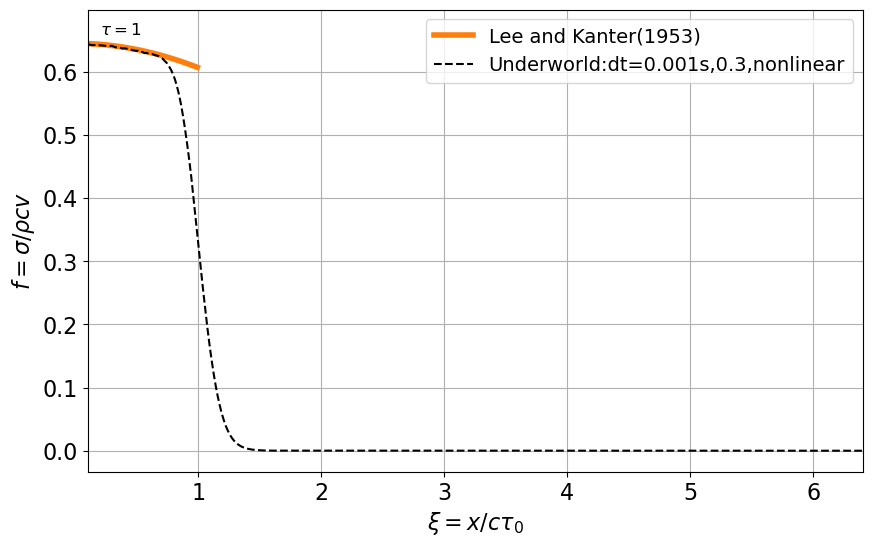

In [9]:


vel = uw.mesh.MeshVariable( mesh, 3 )
meshRatio = uw.mesh.MeshVariable( mesh, 1 )
fig,ax0=plt.subplots(1,1,figsize=(10,6))
# fig,ax0=plt.subplots(1,1)


countx = 400
dy = (maxY-minY)/resY
dx = (maxX-minX)/resX
xcoord = np.linspace(minX, maxX, countx)
xcoord_a = np.linspace(0, 10, countx)
# xcoord = np.linspace(0.1, 0.25, countx)
#zcoord = np.linspace(0.0,maxY, countz)
surfacePoints = np.zeros((countx,2))
surfacePoints[:,0] = xcoord 
surfacePoints[:,1] = 0.*dy 

tao0= 0.05
v0 = np.sqrt(3e10/2700)
sigma0 = nd(2700*v0*20*u.pascal)

styles = ['k--','b--']
num = 1
import scipy

# Path = ["Wave_taoD05_dt0001_8003","Wave_taoD05_dt001_8003"]
Path = ["Wave_taoD05_dt001_8003_rk2_hybrid_omiga1_nonlinear"]
# Path = ["Wave_taoD05_dt001_8003_rk2_Origin2"]
for j in range(len(Path)):
    
    outputPath = os.path.join(os.path.abspath("."),Path[j]+"/") 
    step = 0
    fo = open(outputPath+"dicMesh"+str(step).zfill(4),'r')
    meshDic=eval(fo.read())
    elementType = "Q2/dpc1"
    # elementType = "Q1/dQ0"
    
    mesh = uw.mesh.FeMesh_Cartesian( elementType = elementType,
                                     elementRes  = meshDic['elements'], 
                                     minCoord    = meshDic['minCoord'], 
                                     maxCoord    = meshDic['maxCoord'],
                                     ) 

    resX=meshDic['elements'][0]
    resY=meshDic['elements'][1]
    vel = uw.mesh.MeshVariable( mesh, 2 )
    stress = uw.mesh.MeshVariable( mesh, 1 ) 

    for i in range(num):
        if j ==0:
#             step = 500*(0+i)+500
#             step = 50*(0+i)+50
            step = 50*(0+i)+50
        else:
            step =  50*(0+i)+50
        time = np.load(outputPath+"time"+str(step).zfill(4)+".npy")/nd(1.*u.second)
#         vel.load(outputPath+'velocityField'+str(step).zfill(4))
        stress.load(outputPath+'stress'+str(step).zfill(4))
    #     ax0.plot((xcoord),vel[1].evaluate(surfacePoints))
        psi = (xcoord)/nd(1.*u.meter)/(v0*tao0)
        psi_trans =  (maxX-xcoord)/nd(1.*u.meter)/(v0*tao0)
        tau = i+1
        psi_a = xcoord_a/nd(1.*u.meter)/(v0*tao0)
        f_a = np.exp(-tau/2.)*np.i0(0.5*np.sqrt(tau**2-psi_a**2))*np.heaviside(tau-psi_a,0)
        if i<num-1:            
            if j==0:
                ax0.plot(psi_a,f_a,color='C1',linewidth=4)
                ax0.text(0.2,1.02*np.nanmax(f_a),r'$\tau=$'+str(i+1),fontsize=12)
            ax0.plot(psi_trans,stress.evaluate(surfacePoints)/sigma0,styles[j])
            
        else:
            if j == 0:
                ax0.plot(psi_a,f_a,color='C1',linewidth=4,label='Lee and Kanter(1953)')  
                ax0.plot(psi_trans,stress.evaluate(surfacePoints)/sigma0,styles[j],label='Underworld:dt=0.001s,0.3,nonlinear')
                ax0.text(0.2,1.02*np.nanmax(f_a),r'$\tau=$'+str(i+1),fontsize=12)
            else:
                ax0.plot(psi_trans,stress.evaluate(surfacePoints)/sigma0,styles[j],label='Underworld:dt=0.001s')


        

    # ax0.invert_xaxis()  
ax0.legend(fontsize=14)

ax0.grid()
# ax0.set_xlim([0,1])
ax0.set_xlim([0.1,6.4])   
ax0.set_xlabel(r'$\xi=x/c \tau_0$', fontsize=16)
ax0.set_ylabel(r'$f=\sigma/\rho c v $', fontsize=16)
ax0.tick_params(axis='x', labelsize= 16)
ax0.tick_params(axis='y', labelsize= 16)
# plt.savefig('/home/haibin/Desktop/'+'Maxwell_tauD005_D001_Q2_800_dt_compare_0D3_nonlinear.jpg',dpi=300)